In [11]:
import polars as pl

In [12]:
df = pl.read_csv("Downloads/DataSource/Donnees_changement_climatique-SIM_décadaire/DECAD_SIM2_*.csv.gz", has_header=True, separator=";")

In [13]:
dfp = df.to_pandas();
import pandas

In [14]:
''' Aperçu du jeu de données initial (brut) '''
dfp.head(5)

,LAMBX,LAMBY,DATE,DECADE,PRENEI_DECAD,PRELIQ_DECAD,PRETOTD_DECAD,T_DECAD,EVAP_DECAD,ETP_DECAD,PE_DECAD,SWI_DECAD,SSWI_DECAD,ECOULEMENT_DECAD,DRAINC_DECAD,RUNC_DECAD
0,600,24010,195808,1,0.0,35.4,35.4,16.3,15.1,25.4,20.3,0.347,-1.10,0.0,0.0,1.0
1,600,24010,195808,2,0.0,37.5,37.5,16.6,18.9,24.3,18.6,0.398,-0.54,0.0,0.0,1.4
2,600,24010,195808,3,0.0,28.2,28.2,15.7,24.9,24.4,3.3,0.470,0.23,0.0,0.3,1.0
3,600,24010,195809,1,0.0,13.4,13.4,17.3,21.0,25.0,-7.6,0.451,0.01,0.0,0.0,0.4
4,600,24010,195809,2,0.0,39.6,39.6,16.8,14.9,16.1,24.7,0.424,-0.26,0.0,0.1,1.9


In [15]:
''' Transformation des coordonnées projetées en mètre à partir des hectomètre '''
dfp["LAMBX"] = dfp["LAMBX"] * 100
dfp["LAMBY"] = dfp["LAMBY"] * 100 

In [16]:
""" Interval de dates du jeu de données """
print(dfp['DATE'].values.min(), dfp['DATE'].values.max())

195808 202509


In [17]:
''' Construction de trois dates par mois à partir de l'information mois-année et du numero de deacade '''
dfp_decade1 = dfp.loc[dfp["DECADE"] == 1]
dfp_decade23 = dfp.loc[dfp["DECADE"] > 1]
DATE_TO_PARSE_1 = dfp_decade1['DATE'].astype(str) + '0' + ((dfp_decade1['DECADE']*10)-9).astype(str)
DATE_TO_PARSE_2 = dfp_decade23['DATE'].astype(str) + ((dfp_decade23['DECADE']*10)-9).astype(str)
Date_res = DATE_TO_PARSE_1.combine (DATE_TO_PARSE_2,max,fill_value='0') 
dfp['DATE_TO_PARSE'] = Date_res.astype("string")
dfp['DATE_TO_PARSE'].head(10)

0    19580801
1    19580811
2    19580821
3    19580901
4    19580911
5    19580921
6    19581001
7    19581011
8    19581021
9    19581101
Name: DATE_TO_PARSE, dtype: string

In [18]:
''' Controle des types de données présentes '''
dfp.dtypes

LAMBX                        int64
LAMBY                        int64
DATE                         int64
DECADE                       int64
PRENEI_DECAD               float64
PRELIQ_DECAD               float64
PRETOTD_DECAD              float64
T_DECAD                    float64
EVAP_DECAD                 float64
ETP_DECAD                  float64
PE_DECAD                   float64
SWI_DECAD                  float64
SSWI_DECAD                 float64
ECOULEMENT_DECAD           float64
DRAINC_DECAD               float64
RUNC_DECAD                 float64
DATE_TO_PARSE       string[python]
dtype: object

In [19]:
dfp['Date'] =  pandas.to_datetime(arg=dfp['DATE_TO_PARSE'] , format = "%Y%m%d")
dfp.drop(labels='DATE_TO_PARSE', axis=1, inplace=True)

In [20]:
''' Aperçu des données '''
pandas.set_option("display.max_columns", None)
dfp.head()

,LAMBX,LAMBY,DATE,DECADE,PRENEI_DECAD,PRELIQ_DECAD,PRETOTD_DECAD,T_DECAD,EVAP_DECAD,ETP_DECAD,PE_DECAD,SWI_DECAD,SSWI_DECAD,ECOULEMENT_DECAD,DRAINC_DECAD,RUNC_DECAD,Date
0,60000,2401000,195808,1,0.0,35.4,35.4,16.3,15.1,25.4,20.3,0.347,-1.10,0.0,0.0,1.0,1958-08-01
1,60000,2401000,195808,2,0.0,37.5,37.5,16.6,18.9,24.3,18.6,0.398,-0.54,0.0,0.0,1.4,1958-08-11
2,60000,2401000,195808,3,0.0,28.2,28.2,15.7,24.9,24.4,3.3,0.470,0.23,0.0,0.3,1.0,1958-08-21
3,60000,2401000,195809,1,0.0,13.4,13.4,17.3,21.0,25.0,-7.6,0.451,0.01,0.0,0.0,0.4,1958-09-01
4,60000,2401000,195809,2,0.0,39.6,39.6,16.8,14.9,16.1,24.7,0.424,-0.26,0.0,0.1,1.9,1958-09-11


In [21]:
""" Observation de l'évolution des températures moyennes de trois villes : Paris-Ivry,  Nantes - Orvault, Marseille-12eme """
# Récupérations des valeurs ne concernant que ces lieux
dfp_paris = dfp.loc[dfp["LAMBX"] == 604000].loc[ dfp["LAMBY"] == 2425000]
dfp_paris["Ville"] = "Paris-Ivry"
dfp_paris_estival = dfp_paris.loc[dfp_paris['Date'].dt.month.isin([7,8])]

dfp_nantes = dfp.loc[dfp["LAMBX"] == 300000].loc[ dfp["LAMBY"] == 2257000]
dfp_nantes["Ville"] = "Nantes-Orvault"
dfp_nantes_estival = dfp_nantes.loc[dfp_nantes['Date'].dt.month.isin([7,8])]

dfp_marseille_12me = dfp.loc[dfp["LAMBX"] == 852000].loc[ dfp["LAMBY"] == 1817000]
dfp_marseille_12me["Ville"] = "Marseille-12eme"
dfp_marseille_12eme_estival = dfp_marseille_12me.loc[dfp_marseille_12me['Date'].dt.month.isin([7,8])]

In [22]:
# Export des données préparées pour utilisation ulterieur
dfp_marseille_12me.to_csv('dfp_marseille_12me.csv')

Observation de la serie de températures pour chacune des trois villes choisies
--

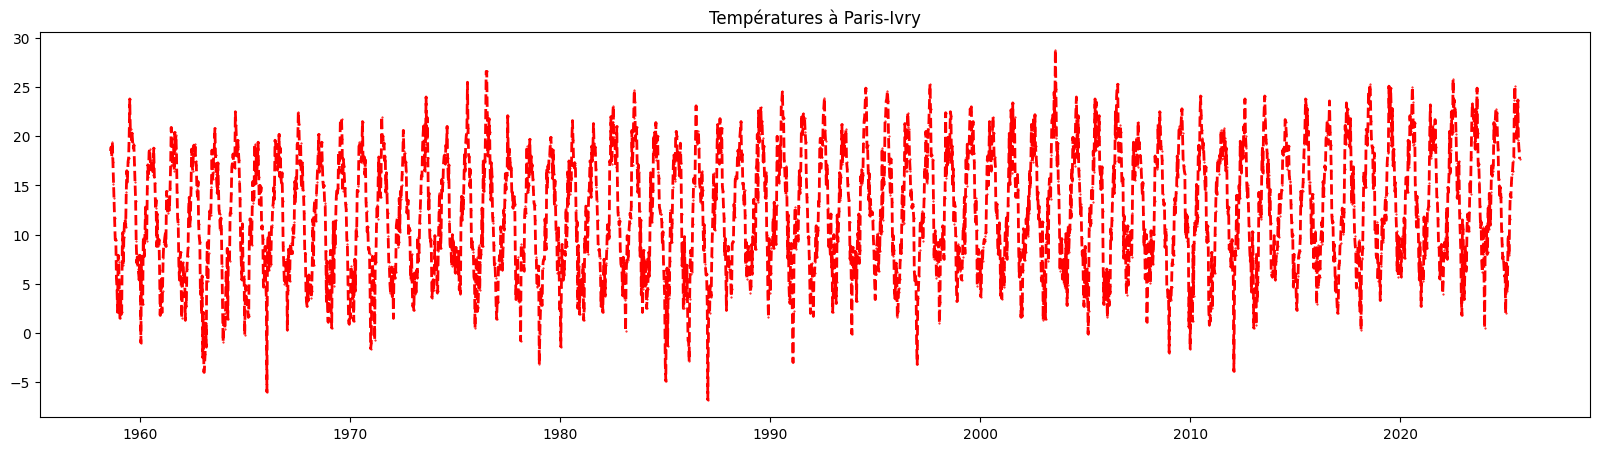

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
x= dfp_paris['Date']
y= dfp_paris['T_DECAD']
plt.title('Températures à Paris-Ivry')
plt.ylabel = 'T°c';
plt.plot(x, y, label='', color='red', marker='.', linestyle='--',linewidth=2, markersize=1);


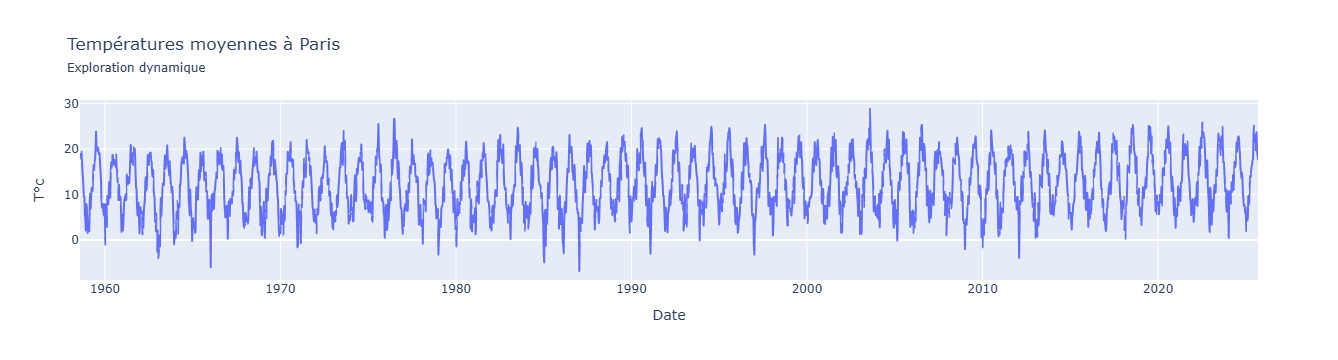

In [24]:
import plotly.express as px
fig = px.line(dfp_paris, x="Date", y="T_DECAD",
              title="Températures moyennes à Paris", subtitle = "Exploration dynamique",
              labels={"T_DECAD":"T°c"},
              hover_data=["Date", "T_DECAD"]
             )
fig.show()

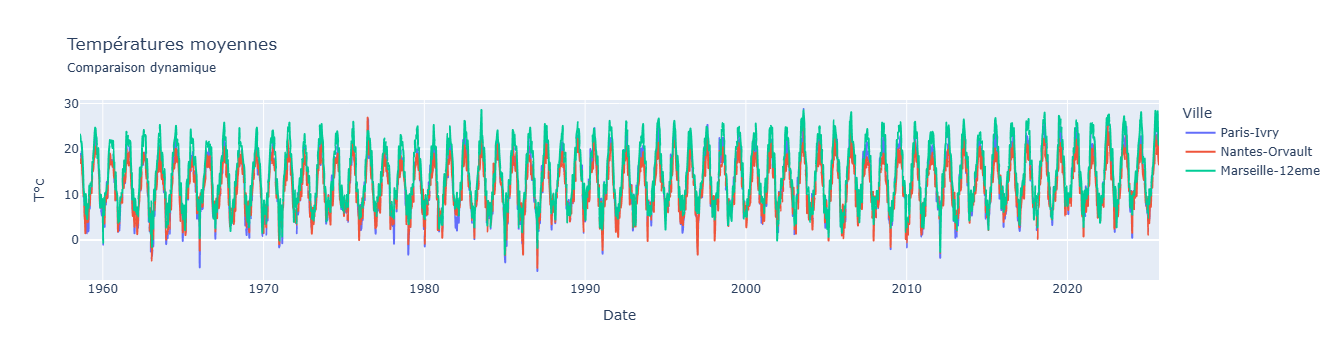

In [25]:
dfp_comparaison_villes = pandas.concat([dfp_paris, dfp_nantes, dfp_marseille_12me])

fig = px.line(dfp_comparaison_villes, x="Date", y="T_DECAD",
              title="Températures moyennes", subtitle = "Comparaison dynamique",
              labels={"T_DECAD":"T°c"}, 
              hover_data=["Date", "T_DECAD"],
              color = 'Ville'
             )
fig.show()

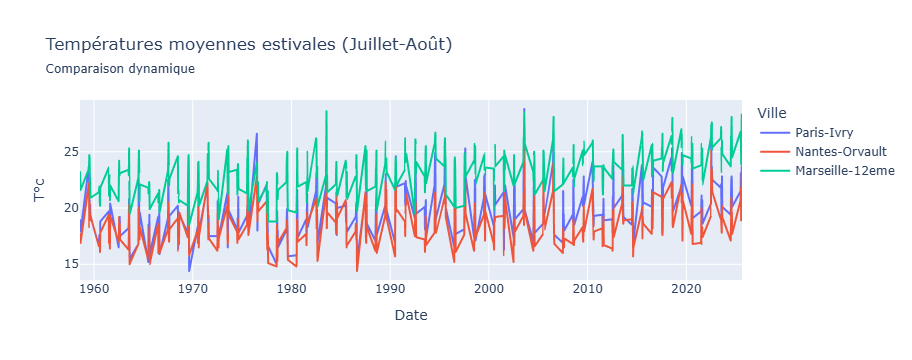

In [26]:
dfp_comparaison_villes_estival = pandas.concat([dfp_paris_estival , dfp_nantes_estival, dfp_marseille_12eme_estival])
fig = px.line(dfp_comparaison_villes_estival, x="Date", y="T_DECAD",
              title="Températures moyennes estivales (Juillet-Août)", subtitle = "Comparaison dynamique",
              labels={"T_DECAD":"T°c"}, 
              hover_data=["Date", "T_DECAD"],
              color = 'Ville'
             )
fig.show()

Problématique :<br/> La moyenne des T°c decadaires estivales de Paris ont-elles significativement augmentées depuis 2001 ? 
--
Pour tenter d'y répondre : 
- Réalisation d'indicateurs statistiques de position et de dispersion avec les données de Paris.
- Réalisation de tests statistiques sue les données de Paris.

In [30]:
dfp_1_lieu_estival = dfp_paris_estival

''' Constitution de 2 séries : 1953-2000 servant de référence  et 2001-2025 servant d'échantillon '''
s1 = dfp_1_lieu_estival.loc[dfp_1_lieu_estival['Date'].dt.year.isin([1950,2000])]
s2 = dfp_1_lieu_estival.loc[dfp_1_lieu_estival['Date'].dt.year.isin([2001,2025])]

<Axes: xlabel='T_DECAD', ylabel='Type_serie'>

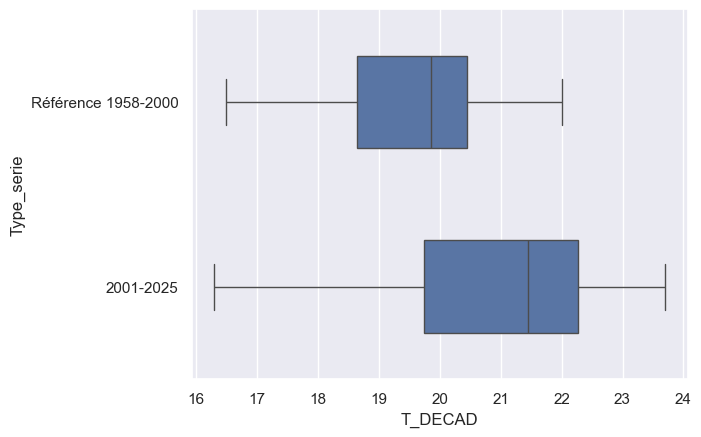

In [33]:
''' Indicateurs statistiques descriptives sur les temperatures '''
import seaborn as sn
sn.set_theme()
with pandas.option_context('mode.chained_assignment','warn'):
    s1.loc[:,'Type_serie'] = 'Référence 1958-2000'
    s2.loc[:,'Type_serie'] =  '2001-2025'
s1_s2 = pandas.concat([s1,s2])
sn.boxplot(x='T_DECAD', y='Type_serie' , data=s1_s2, flierprops={"marker": "x"},
          width=0.5)


Une boîte à moustaches (ou boxplot en anglais), cherche à représenter visuellement une distribution d'une variable
à l'aide d'indicateurs de position et de dispersion.
Les indicateurs représentés dans un boxplot sont les suivants:
<br/>
Position : Le premier quartile  𝑄1 , la médiane ou le second quartile  𝑄2 et le troisème quartile  𝑄3
Dispersion : L'écart interquartile  𝐼𝑄𝑅
Les moustaches représentent l'étendue des valeurs que l'on considère normales.
Au-delà de ces moustaches, on considère les points représentés comme des valeurs extrêmes.
'''

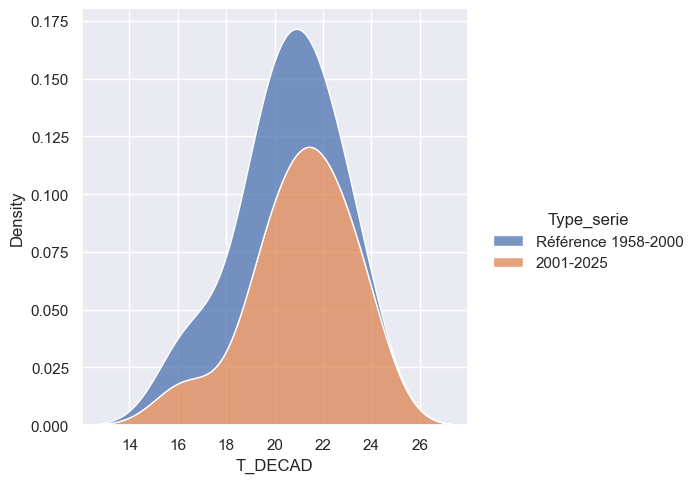

In [34]:
sn.set_theme()
sn.displot(data=s1_s2, x="T_DECAD", hue="Type_serie",
           multiple="stack",
           kind="kde"
          )

Test statistique tentant de répondre à la problèmatique : <br/>
La moyenne des températures a t-elle significativement augmentée entre ces deux époques ?

In [105]:
import numpy as np

def S(echantillon:list, m0:float)->float:
    """ Calcule la statistique de test à partir de l'échantillon et de la moyenne théorique.
    Parameters
    ------------
    echantillon : liste des des valeurs observées
    m0 : moyenne théorique
    """
    return (np.mean(echantillon) - m0) * np.sqrt(len(echantillon)) / np.std(echantillon,ddof=1)


In [106]:
''' Calcul de la statistique de notre échantillon (les valeurs de temperatures mesurées sur la période 2001-2025)'''
t_ref = np.mean(s1['T_DECAD'].values) 
S_obs = S(s2['T_DECAD'].values, t_ref)
print(S_obs)

2.6029438922926467


Test de student sur les échantillons que sont nos données, permettant de conserver ou écarter 
l'hypothese H0. <br/>
H0 :  "la moyenne des temperatures est inchangée, entre les deux périodes : 1958-2000 (la référence) et 2000-2025"

In [108]:
from scipy.stats import t 

# Proba d'observer cette statistique (issu de notre echantillon : la série 2) si l'hypothèse H0 est vérifiée.
p_Sobs = t.cdf(S_obs, df=s2.size-1)
p_value_Sobs = 1 - p_Sobs
print(p_value_Sobs)

0.004925843111774353


'La proba est très faible, (<5% par ex.) donc on estime que H0 est faux : donc la moyenne des températures a changé.'

La proba d'observer une statistique égale au supérieur à celle-ci issue de notre 2eme série, est très faible (<5% ) <br/>
donc on écarte l'hypothèse H0 est faux ; l'hypothèse alternative est privilégiée : la moyenne des températures a augmenté.

In [111]:
# Ecriture plus concise utilisant la fonction ttest_1samp
from scipy.stats import ttest_1samp 
S_echantillon, p_value = ttest_1samp(a=s2['T_DECAD'].values, popmean=t_ref, alternative='greater')
print("Statistique S de l'echantillon:", S_echantillon, " P_value(S> S_ech) =", p_value)
"""La proba est très faible, (<5% ) donc on estime que H0 est faux : donc la moyenne des températures a changé."""

Statistique S de l'echantillon: 2.602943892292647  P_value(S> S_ech) = 0.012282350310494385


'La proba est très faible, (<5% ) donc on estime que H0 est faux : donc la moyenne des températures a changé.'

Etude des précipitations
--

In [36]:
cumul = dfp_1_lieu_estival.groupby(dfp_1_lieu_estival['Date'].dt.year).agg({'PRETOTD_DECAD' : 'sum'})
cumul

,PRETOTD_DECAD
Date,
1958,101.1
1959,47.4
1960,185.2
1961,88.9
1962,107.9
...,...
2021,103.4
2022,34.0
2023,116.7


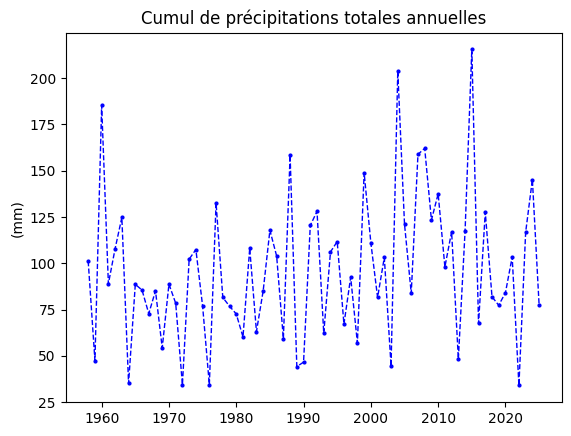

In [44]:
# Cumul annuelles des précipitations
fig, ax = plt.subplots();
ax.set_title('Cumul de précipitations totales annuelles')
ax.set_ylabel('(mm)')
ax.plot(cumul.index,
        cumul['PRETOTD_DECAD'],
        color='blue', marker='o', linestyle='dashed',linewidth=1, markersize=2)

plt.show()

Problématique : <br/>
La moyenne des précipitations decadaire estivales ont-elles significativement changées depuis 2001 ?

In [28]:
precipitations_ref = np.mean(s1['PRETOTD_DECAD'].values)
S_echantillon, p_value = ttest_1samp(a=s2['PRETOTD_DECAD'].values, popmean=precipitations_ref, alternative='two-sided')
print("Statistique S de l'echantillon:", S_echantillon, " P_value(S> S_ech) =", p_value)


Statistique S de l'echantillon: -1.5277375595455411  P_value(S> S_ech) = 0.1548074090464421


" La probabilité d'observer cette statistique issue de la 2eme série au sein du modèle dont la moyenne est issue de la 1ere série\nest-elle très faible < 5% ou non ?\nSi proba n'est pas très faible alors on ne peut pas conclure que la moyenne des précipiations a significativement évolué sur la période 2001-2025\n"

La probabilité d'observer cette statistique issue de la 2eme période 2001-2025 au sein du modèle dont la moyenne est issue de la 1ere série 1958-2000
n'est pas très faible (non infèrieure à 5%) <br/>
par conséquent, on conserve l'hypothèse HO (la moyenne des précipitations n'a pas changé) . <br/>
On ne peut pas conclure que la moyenne des précipiations a significativement évoluée sur la période 2001-2025.